In [3]:
import pandas as pd
import os
import numpy as np
import matplotlib as mpl

In [4]:
bcross_df = pd.read_csv('Border_Crossing_Entry_Data.csv')
bcross_df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Location
0,Calexico East,California,2507,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,34447,POINT (-115.48433000000001 32.67524)
1,Van Buren,Maine,108,US-Canada Border,03/01/2019 12:00:00 AM,Rail Containers Full,428,POINT (-67.94271 47.16207)
2,Otay Mesa,California,2506,US-Mexico Border,03/01/2019 12:00:00 AM,Trucks,81217,POINT (-117.05333 32.57333)
3,Nogales,Arizona,2604,US-Mexico Border,03/01/2019 12:00:00 AM,Trains,62,POINT (-110.93361 31.340279999999996)
4,Trout River,New York,715,US-Canada Border,03/01/2019 12:00:00 AM,Personal Vehicle Passengers,16377,POINT (-73.44253 44.990010000000005)


In [5]:
transport_information = bcross_df.drop(["Port Code","Border","Location","Date","State"], axis=1)
transport_information.head()

,Port Name,Measure,Value
0,Calexico East,Trucks,34447
1,Van Buren,Rail Containers Full,428
2,Otay Mesa,Trucks,81217
3,Nogales,Trains,62
4,Trout River,Personal Vehicle Passengers,16377


In [6]:
transport_information = transport_information.loc[transport_information['Value'] !=0]
by_port_name = transport_information.groupby(['Port Name', 'Measure'])['Value'].sum()
by_port_name

Port Name       Measure                    
Alcan           Bus Passengers                   259693
                Buses                             11500
                Pedestrians                        5738
                Personal Vehicle Passengers     2503611
                Personal Vehicles               1158347
                Truck Containers Empty            18067
                Truck Containers Full            128033
                Trucks                           140100
Alexandria Bay  Bus Passengers                  1526743
                Buses                             45051
                Pedestrians                       24385
                Personal Vehicle Passengers    35763246
                Personal Vehicles              15098846
                Truck Containers Empty           323435
                Truck Containers Full           4158215
                Trucks                          5127928
Algonac         Personal Vehicles                 63825
Ambr

In [7]:
nonhumans = ["Trucks", "Buses", "Personal Vehicles"]
transport_info2 = transport_information[transport_information.Measure.isin(nonhumans)]
transport_info_sorted = transport_info2.groupby(['Port Name'])['Value'].sum()
transport_info_sorted2 = transport_info_sorted.sort_values(ascending=False)
transport_info_sorted3 = transport_info_sorted2.nlargest(5)
transport_info_sorted3

Port Name
El Paso                  326400534
San Ysidro               323842139
Laredo                   177783450
Detroit                  170090793
Buffalo-Niagara Falls    168152722
Name: Value, dtype: int64

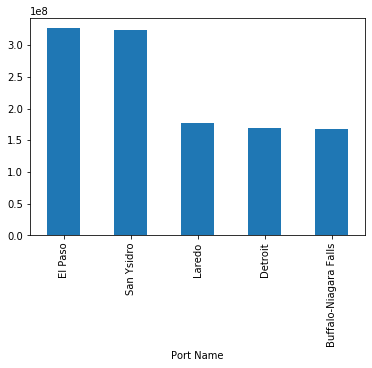

In [52]:
transport_info_sorted3.plot.bar()

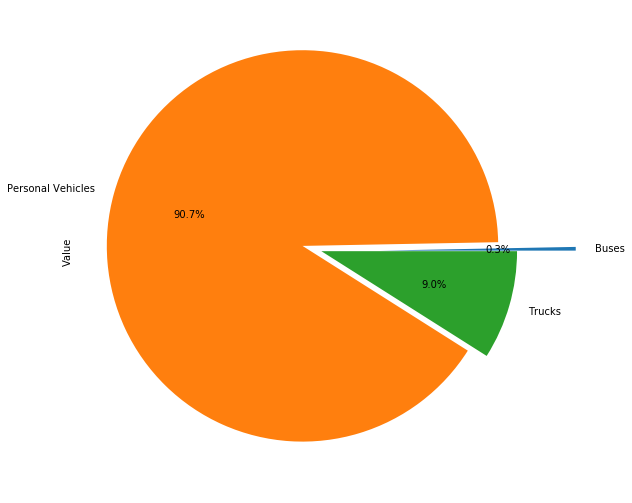

In [53]:
transport_pie = transport_info2.drop(['Port Name'], axis=1)
transport_pie2 = transport_pie.groupby(['Measure'])['Value'].sum()
transport_pie2.plot.pie(explode=(0.3,.1,0) ,autopct='%1.1f%%',figsize=(9, 9))